### This notebook contains
- The meaning of parameters in the ```oblate_lc``` function

- How to generate a light curve of the oblate planet with JoJo

- What is the oblateness signal like

- How to generate a light curve of the planet with a ring by ```ring_lc```

#### Oblate model

We can us ```oblate_lc``` in ```jojo_oblate.py``` to calculate the transit light curve due to an oblate planet. ```oblate_lc``` requires the following 9 parameters:

- transit parameters(array):\
    $t_0$: the mid-transit time\
    $b$: the impact parameter of transit\
    $P$: the orbital period (day)\
    $r_{eq}$: the equatorial radius of the planet/stellar radius\
    $f$: the planet oblateness\
    $\theta$: the planet spin obliquity, $-\pi/2\leq\theta\leq\pi/2$\
    $u_1,~u_2$: the quadratic limb-darkening coeeficients\
    $\log_{10}{\rho_{\star}}$: the stellar "mean density" (The stellar density assuming circular planetary orbit, which has a relationship with the true stellar mean density as eq(6) in <a href='https://iopscience.iop.org/article/10.1088/0004-637X/756/2/122'>Dawson & Johnson 2012</a>)

- time_array: the light curve time series (day).
- exp_time: the exposure time
- supersample_factor: The number of interpolations between data points for long exposures(exposure time $>$ 5 min)
- n_step: The step number of integral, and at least 30 steps are needed to reach $<$ 1 ppm precision. The default value is 100.

Let us take Kepler-167e as an example and calculate the light curve assuming the oblateness is $0.1$ and obliquity is $45^{\circ}$

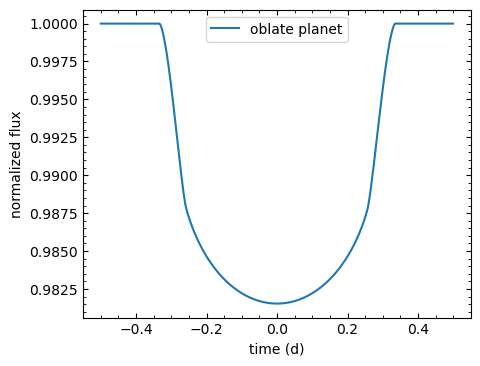

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import JoJo.jojo_oblate as ob

t = np.arange(-0.5, 0.5, 1/60./24.)
pars = [0, 0.233, 1071.23228, 0.1281, 0.1, np.pi/4, 0.6226, 0.0498, 0.46] # From Kipping et al. 2016
f_ob, t_con = ob.oblate_lc(pars, t)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(t, f_ob, label='oblate planet')
ax.set_xlabel('time (d)')
ax.set_ylabel('normalized flux')
plt.legend()
plt.show()

We can also use ```spherical_lc``` to generate the light curve of a perfectly spherical planet with the same cross-section. The oblateness signal is defined as the difference of their light curves.

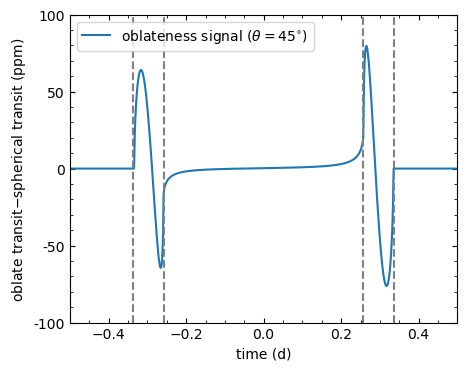

In [6]:
f_sp, t_con = ob.spherical_lc(pars, t)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(t, f_ob-f_sp, label=r'oblateness signal ($\theta=45^{\circ}$)')
for t_i in t_con:
    ax.axvline(t_i, ls='--', c='grey')

ax.set_xlabel('time (d)')
ax.set_ylabel('oblate transit$-$spherical transit (ppm)')
ax.set_yticks([0.0001, 0.00005, 0., -0.00005, -0.0001])
y_tick_labels = ['100', '50', '0', '-50', '-100']
ax.set_yticklabels(y_tick_labels)
ax.set_xlim(-0.5, 0.5)
plt.legend()
plt.show()

The shape of the oblateness signal primarily relies on the impact parameter $b$ and the obliquity $\theta$. When $b\neq0$, and $\theta\neq 0^{\circ}$ or $90^{\circ}$, the oblateness signal is asymmetrical. The figures illustrate distinct oblateness signals corresponding to different obliquities.

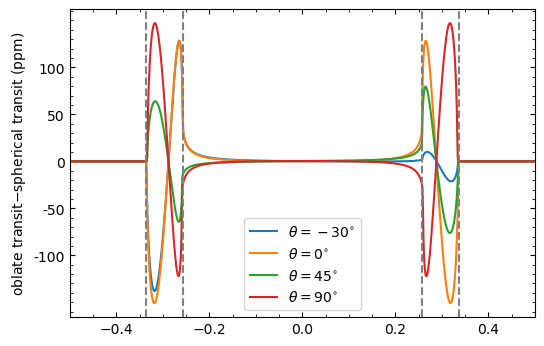

In [7]:
t = np.arange(-0.5, 0.5, 1/60./24.)
pars = [0, 0.233, 1071.23228, 0.1281, 0.1, np.pi/4, 0.6226, 0.0498, 0.46] # From Kipping et al. 2016

fig, ax = plt.subplots(1, 1, figsize=(6,4))
#color = ['limegreen', 'red', 'royalblue']
theta = [-30, 0, 45, 90]
for i in range(len(theta)):
    pars[5] = theta[i]*np.pi/180
    f_ob, t_con = ob.oblate_lc(pars, t)
    f_sp, t_con = ob.spherical_lc(pars, t)
    lab = r'$\theta={}$'.format(theta[i])
    ax.plot(t, f_ob-f_sp, label=lab+r'$^{\circ}$')

for t_i in t_con:
    ax.axvline(t_i, ls='--', color='grey')
    
ax.set_ylabel('oblate transit$-$spherical transit (ppm)')
ax.set_yticks([0.0001, 0.00005, 0., -0.00005, -0.0001])
y_tick_labels = ['100', '50', '0', '-50', '-100']
ax.set_yticklabels(y_tick_labels)
ax.set_xlim(-0.5, 0.5)
plt.legend()
plt.show()

#### Ring model

With ```ring_lc``` function in ```jojo_ring.py```, we can calculate the light curves of a **spherical** planet with ring given transiting parameters and time series. The required transit parameters are as follows:

- transit parameters(array):\
    $t_0$: the mid-transit time\
    $b$: the impact parameter of transit\
    $P$: the orbital period (day)\
    $r_{p}$: the radius of the planet/stellar radius\
    $r_{in}$: the inner radius of the ring/stellar radius\
    $r_{out}$: the outer radius of the ring/stellar radius\
    $f_r$: the oblateness of the ring (assume the outer ring and inner ring are the same). $f=1-\cos i$, where $i$ is the inclination of the ring\
    $\theta_r$: the obliquity of the ring, $-\pi/2\leq\theta\leq\pi/2$\
    $u_1,~u_2$: the quadratic limb-darkening coeeficients\
    $\log_{10}{\rho_{\star}}$: the stellar "mean density", same as that in the oblate model\
    opacity: the opacity of the ring. The opacity of 0.5 means only 50% of the light behind the ring is blocked.

Suppose there is a planet whose radius ratio is $r_p=0.05$, and it has a completely opaque (opacity=1) ring with a inner radius of $r_{in}=0.075$ and outer radius of $r_{out}=0.1$. The inclination of the ring is $25^\circ$, which means the oblateness of the projected ring is $f_r=1-\cos 25^\circ=0.094$. The projected obliquity of the ring is supposed to be $45^\circ$. So the transit light curve is:

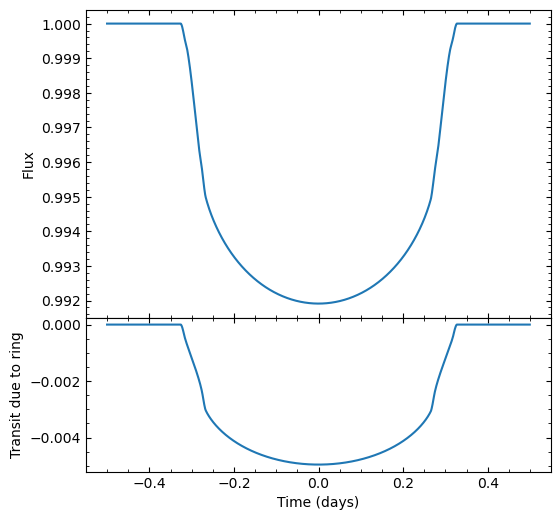

In [8]:
import JoJo.jojo_ring as ring

t = np.arange(-0.5, 0.5, 1/60./24.)
parr = [0, 0.233, 1071.23228, 0.05, 0.075, 0.1, 0.094, np.pi/4, 0.6226, 0.0498, 0.46, 1]
f_r = ring.ring_lc(parr, t)

parp = [0, 0.233, 1071.23228, 0.05, 0, 0, 0.6226, 0.0498, 0.46]
f_p, t_con = JoJo.spherical_lc(parp, t)

fig, axs = plt.subplots(2, 1, figsize=(6,6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
axs[0].plot(t, f_r)
axs[0].set_ylabel('Flux')
axs[1].plot(t, f_r-f_p)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Transit due to ring')
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


By substracting the light curve of a spherical planet, we can see the light curve produced by the ring, as shown in the lower pannel.